In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Load dataset
df = pd.read_csv("property_sales.csv")

# Display dataset info
df.info()

# Show first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date Sold         1400 non-null   object 
 1   Sale Price (€)    1400 non-null   float64
 2   Location          1400 non-null   object 
 3   Year Built        1344 non-null   float64
 4   Garden            1400 non-null   object 
 5   Garage            1400 non-null   object 
 6   Description       1400 non-null   object 
 7   First Time Buyer  1400 non-null   object 
dtypes: float64(2), object(6)
memory usage: 87.6+ KB


,Date Sold,Sale Price (€),Location,Year Built,Garden,Garage,Description,First Time Buyer
0,Sold 2021-01-10,381302.0,Broomhouse,1967.0,Yes,Yes,Type: Detached; Style: 1.5-Storey; 3 Bedrooms;...,No
1,Sold 2021-01-10,325898.0,Broomhouse,1978.0,Yes,???,Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...,Yes
2,Sold 18 January 2021,370354.0,Oak Park,1961.0,Yes,No,Type: Detached; Style: 1-Storey; 3 Bedrooms; 2...,No
3,Sold 2021-01-23,92480.0,Beacon Hill,1958.0,Yes,No,Type: Bungalow; 1 Bathroom; Style: 1-Storey; 1...,Yes
4,Sold 2021-01-25,312030.0,Brookville,1987.0,Yes,Yes,Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...,No


In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [24]:
df["Year Built"] = pd.to_numeric(df["Year Built"], errors="coerce")
df["Year Built"].fillna(0, inplace=True)

#  Check if missing values are handled
df["Year Built"].isnull().sum()


0

Garage & Garden (Categorical Approach)

In [25]:
#  Replace '???' with 'Unknown'
df["Garage"] = df["Garage"].replace("???", "Unknown")
df["Garden"] = df["Garden"].replace("???", "Unknown")

#  Check unique values after fixing
print(df["Garage"].unique())
print(df["Garden"].unique())


['Yes' 'Unknown' 'No']
['Yes' 'No' 'Unknown']


Convert Date Sold to Proper Date Format

In [28]:
# Convert 'Date Sold' to string and remove 'Sold' from the beginning
df["Date Sold"] = df["Date Sold"].astype(str).str.replace(r"^Sold\s*", "", regex=True).str.strip()

# Verify the changes
print(df["Date Sold"].head())  # Display first few rows to confirm changes


0         2021-01-10
1         2021-01-10
2    18 January 2021
3         2021-01-23
4         2021-01-25
Name: Date Sold, dtype: object


In [63]:
df.to_csv("property_sales.csv", index=False)


In [64]:
df['Date Sold']= pd.to_datetime(df['Date Sold'], format='mixed')

print(df["Date Sold"].dtype)  # Should now be datetime64[ns]
print(df[["Date Sold"]].head())

datetime64[ns]
   Date Sold
0 2021-01-10
1 2021-01-10
2 2021-01-18
3 2021-01-23
4 2021-01-25


In [30]:
print(df["Date Sold"].isna().sum())  # Count number of NaT values


0


In [31]:
print(df.dtypes)  # Should show 'datetime64[ns]' for 'Date Sold'


Date Sold           datetime64[ns]
Sale Price (€)             float64
Location                    object
Year Built                 float64
Garden                      object
Garage                      object
Description                 object
First Time Buyer            object
dtype: object


In [32]:
# Extract Sale Year & Sale Month from Date Sold
df["Sale Year"] = df["Date Sold"].dt.year
df["Sale Month"] = df["Date Sold"].dt.month

# Verify the extracted columns
print(df[["Date Sold", "Sale Year", "Sale Month"]].head())


   Date Sold  Sale Year  Sale Month
0 2021-01-10       2021           1
1 2021-01-10       2021           1
2 2021-01-18       2021           1
3 2021-01-23       2021           1
4 2021-01-25       2021           1


In [33]:
# Check if any 'Sale Year' or 'Sale Month' values are missing
print("Missing Sale Year:", df["Sale Year"].isna().sum())
print("Missing Sale Month:", df["Sale Month"].isna().sum())


Missing Sale Year: 0
Missing Sale Month: 0


In [34]:
# Check how many missing values exist for 'Year Built', 'Garden', and 'Garage'
print("Missing Year Built:", df["Year Built"].isna().sum())
print("Missing Garden:", df["Garden"].isna().sum())
print("Missing Garage:", df["Garage"].isna().sum())

# Display some examples of missing values
df[["Year Built", "Garden", "Garage"]].head(10)


Missing Year Built: 0
Missing Garden: 0
Missing Garage: 0


,Year Built,Garden,Garage
0,1967.0,Yes,Yes
1,1978.0,Yes,Unknown
2,1961.0,Yes,No
3,1958.0,Yes,No
4,1987.0,Yes,Yes
5,1922.0,No,No
6,1961.0,Yes,Yes
7,1985.0,Yes,No
8,1967.0,Yes,Yes
9,1966.0,Yes,Yes


# Let's check the overall distribution of numerical data.

In [35]:
#  Display summary statistics for numerical columns
print(df.describe())

#  Display summary for categorical columns
print(df.describe(include='object'))

# Check for missing values
print(df.isnull().sum())


                           Date Sold  Sale Price (€)   Year Built  \
count                           1400    1.400000e+03  1400.000000   
mean   2023-02-20 18:10:17.142857216    4.317994e+05  1900.198571   
min              2021-01-10 00:00:00    9.248000e+04     0.000000   
25%              2022-04-29 00:00:00    3.200240e+05  1956.000000   
50%              2023-05-08 00:00:00    3.845285e+05  1976.000000   
75%              2024-04-09 00:00:00    5.031398e+05  2011.000000   
max              2024-12-24 00:00:00    1.660289e+06  2021.000000   
std                              NaN    1.768560e+05   389.281324   

         Sale Year   Sale Month  
count  1400.000000  1400.000000  
mean   2022.670714     6.172143  
min    2021.000000     1.000000  
25%    2022.000000     5.000000  
50%    2023.000000     6.000000  
75%    2024.000000     7.000000  
max    2024.000000    12.000000  
std       1.127092     2.560702  
        Location Garden Garage  \
count       1400   1400   1400   
uniq

# 1. Trend Analysis of Property Sales Over Time

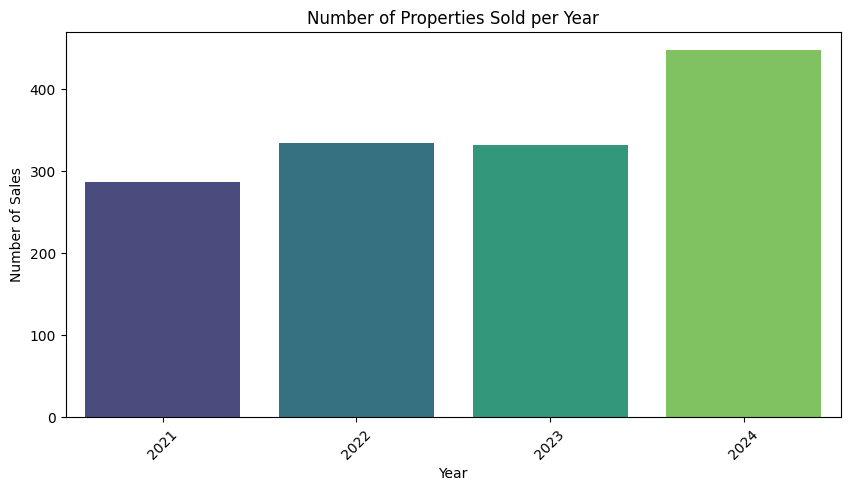

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Sales count per year
plt.figure(figsize=(10,5))
sns.countplot(x="Sale Year", data=df, palette="viridis")
plt.title("Number of Properties Sold per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()


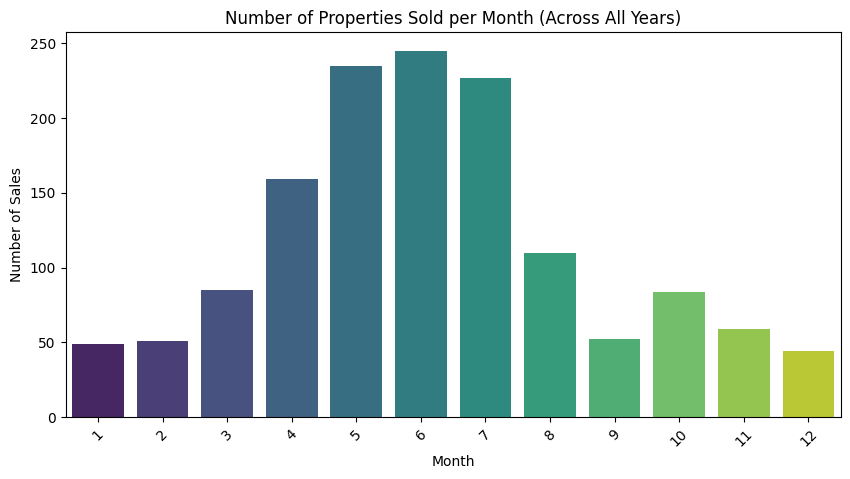

In [37]:
# 📊 Sales count per month
plt.figure(figsize=(10,5))
sns.countplot(x="Sale Month", data=df, palette="viridis")
plt.title("Number of Properties Sold per Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()


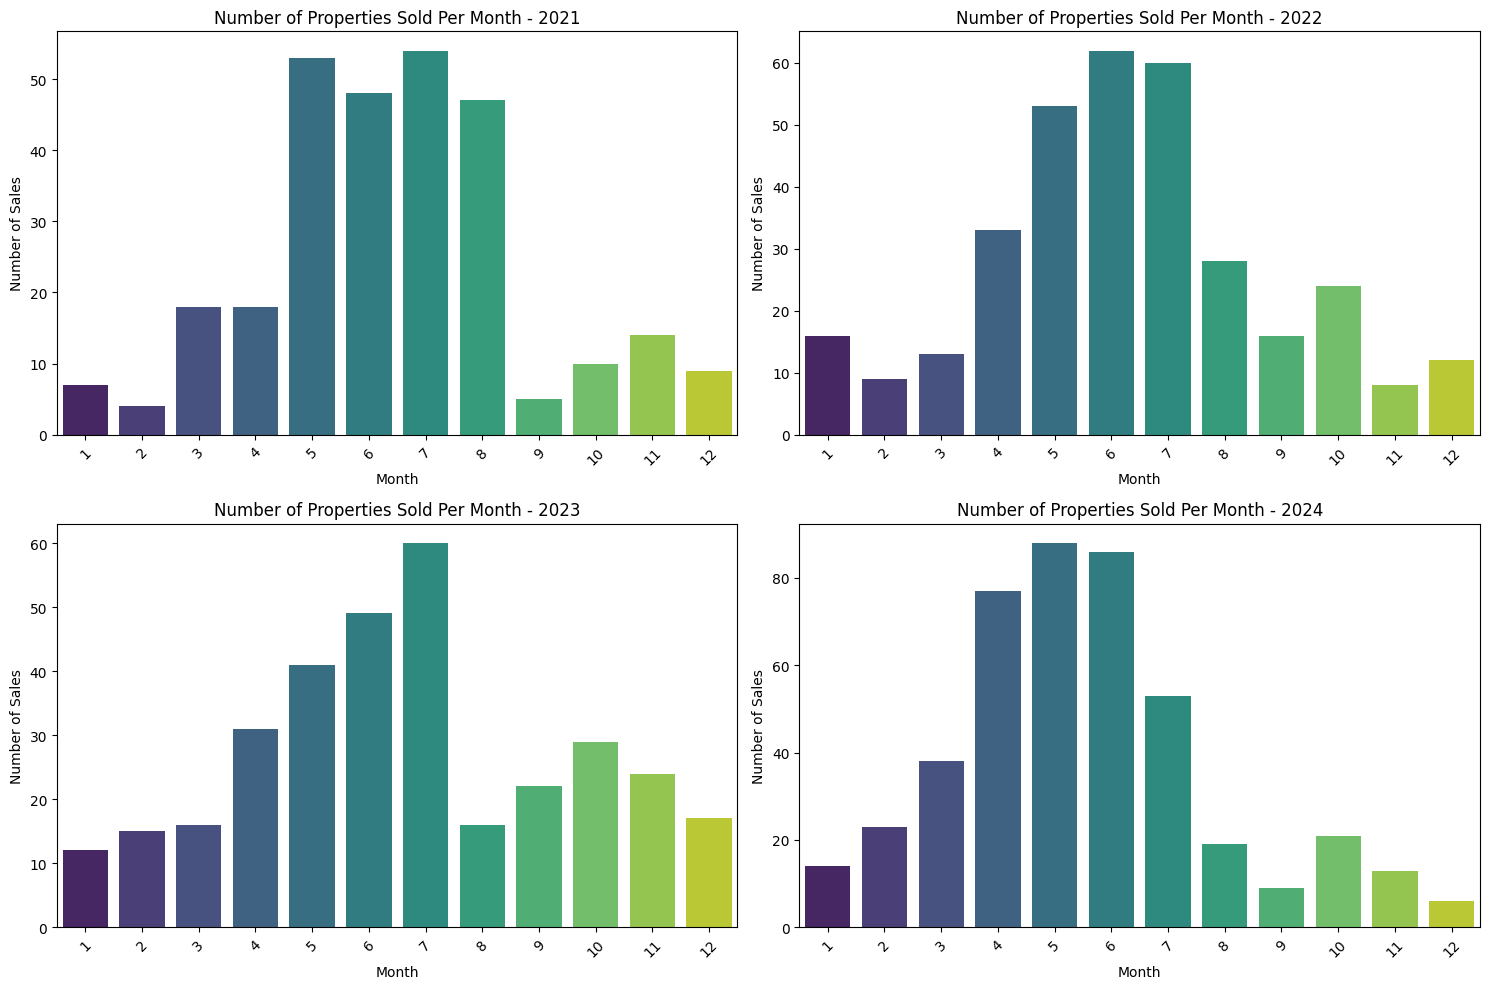

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and month from "Date Sold"
df['Year'] = df['Date Sold'].dt.year
df['Month'] = df['Date Sold'].dt.month

# Get the unique years available in the dataset
unique_years = sorted(df['Year'].unique())

# Create a 2x2 subplot for 4 years
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the first 4 unique years (adjust if needed)
for i, year in enumerate(unique_years[:4]):
    ax = axes[i]
    sns.countplot(x='Month', data=df[df['Year'] == year], palette="viridis", ax=ax)
    ax.set_title(f"Number of Properties Sold Per Month - {year}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of Sales")
    ax.set_xticks(range(12))
    ax.set_xticklabels(range(1, 13))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


# 2. Price Trends Over Time

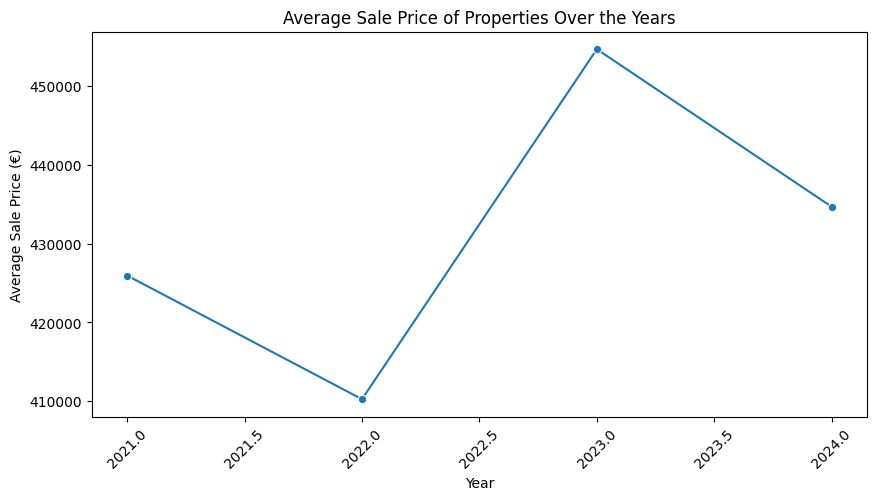

In [41]:
# 📊 Average Sale Price by Year
plt.figure(figsize=(10,5))
sns.lineplot(x="Sale Year", y="Sale Price (€)", data=df, marker="o", ci=None)
plt.title("Average Sale Price of Properties Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Sale Price (€)")
plt.xticks(rotation=45)
plt.show()


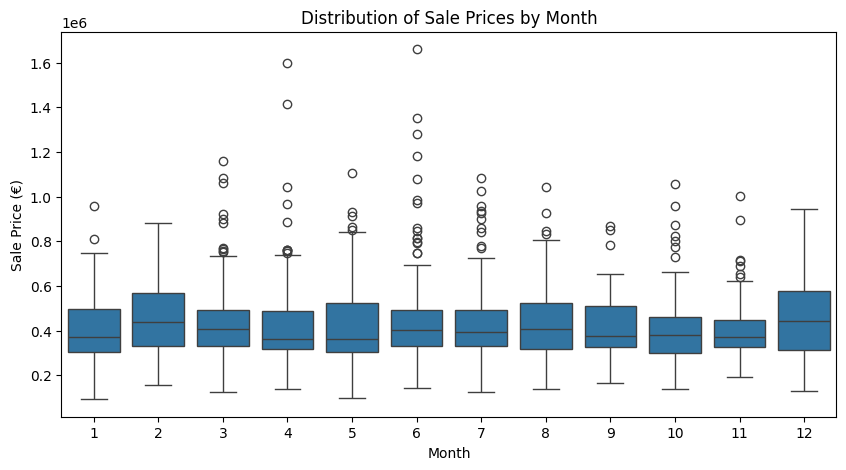

In [42]:
# 📊 Average Sale Price by Month
plt.figure(figsize=(10,5))
sns.boxplot(x="Sale Month", y="Sale Price (€)", data=df)
plt.title("Distribution of Sale Prices by Month")
plt.xlabel("Month")
plt.ylabel("Sale Price (€)")
plt.show()


# 3. Distribution of Sale Prices

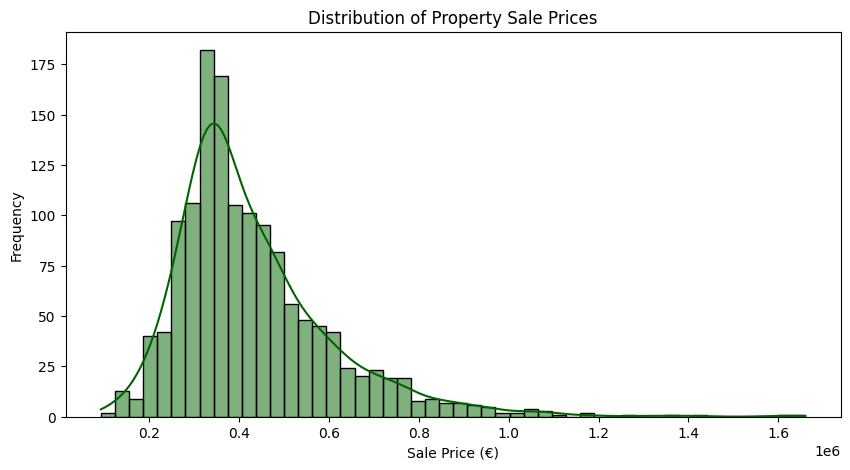

In [62]:
# 📊 Sale Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df["Sale Price (€)"], bins=50, kde=True, color="darkgreen")
plt.title("Distribution of Property Sale Prices")
plt.xlabel("Sale Price (€)")
plt.ylabel("Frequency")
plt.show()


#  4. Impact of Property Features on Price

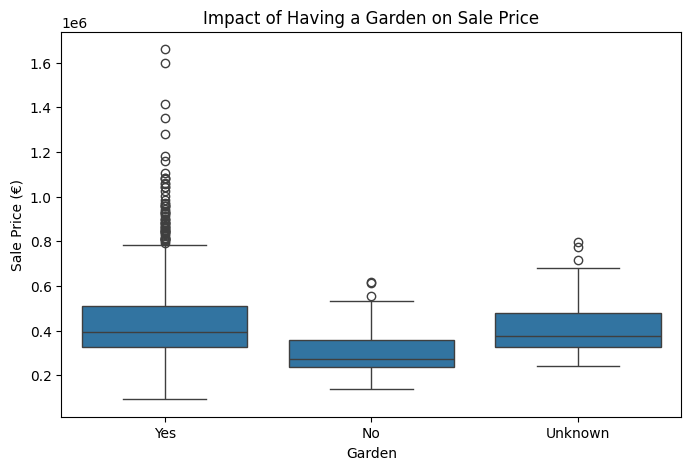

In [45]:
# 📊 Garden vs Sale Price
plt.figure(figsize=(8,5))
sns.boxplot(x="Garden", y="Sale Price (€)", data=df)
plt.title("Impact of Having a Garden on Sale Price")
plt.xlabel("Garden")
plt.ylabel("Sale Price (€)")
plt.show()


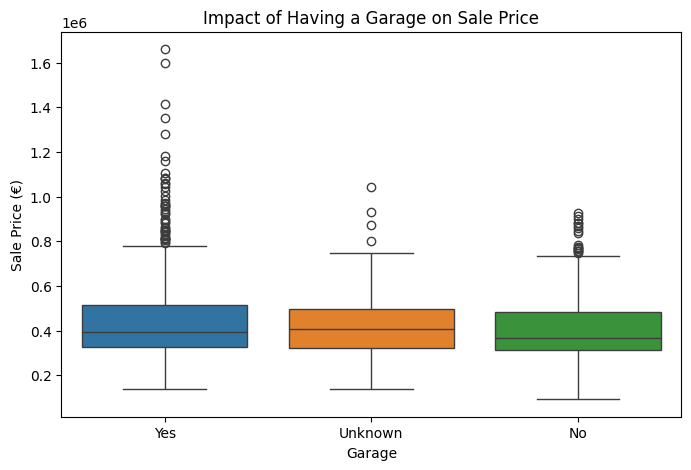

In [58]:
# 📊 Garage vs Sale Price
plt.figure(figsize=(8,5))
sns.boxplot(x="Garage", y="Sale Price (€)", data=df, palette="tab10")
plt.title("Impact of Having a Garage on Sale Price")
plt.xlabel("Garage")
plt.ylabel("Sale Price (€)")
plt.show()


# 5. Geographic Analysis (Top Locations)

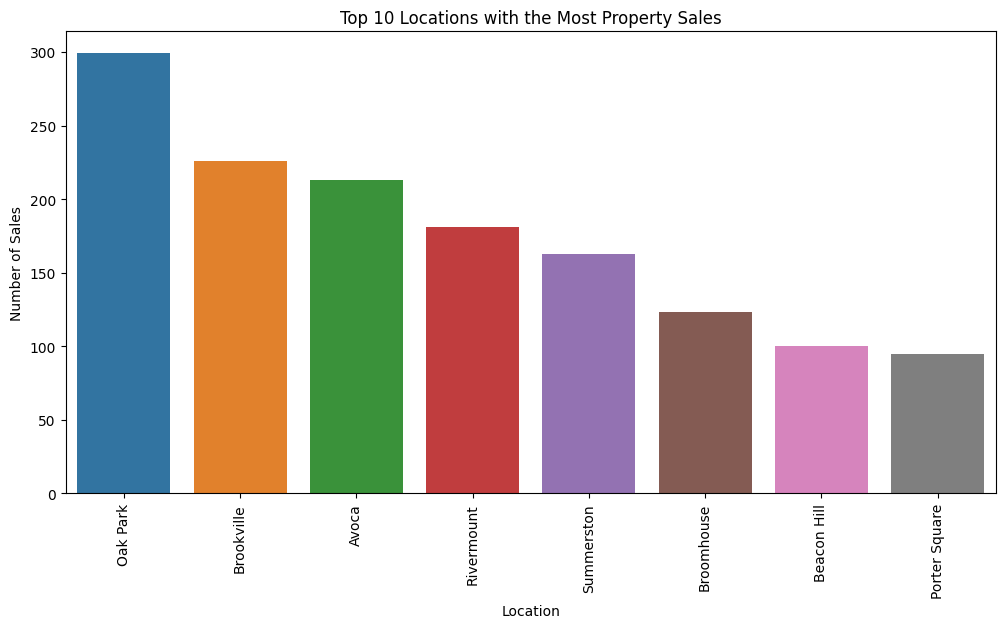

In [59]:
# 📊 Top 10 locations with the most sales
plt.figure(figsize=(12,6))
top_locations = df["Location"].value_counts().nlargest(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette="tab10")
plt.xticks(rotation=90)
plt.title("Top 10 Locations with the Most Property Sales")
plt.xlabel("Location")
plt.ylabel("Number of Sales")
plt.show()


# 6. First-Time Buyers Analysis

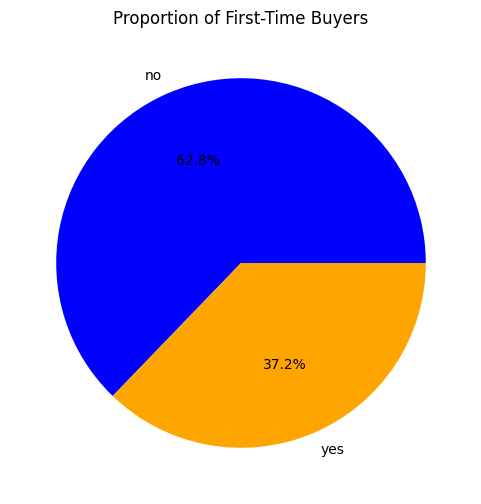

In [53]:
# Standardize the values in "First Time Buyer" column
df["First Time Buyer"] = df["First Time Buyer"].str.strip().str.lower()

# 📊 First-Time Buyer Proportion
plt.figure(figsize=(6,6))
df["First Time Buyer"].value_counts().plot.pie(autopct="%1.1f%%", colors=["blue", "orange"])

plt.title("Proportion of First-Time Buyers")
plt.ylabel("")  # Hide y-axis label
plt.show()


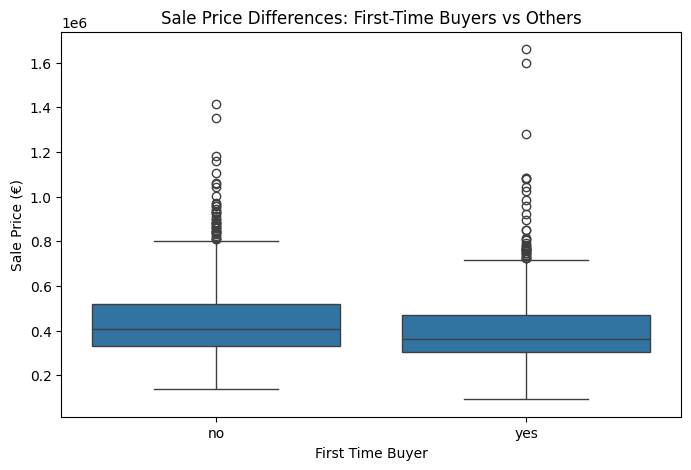

In [68]:
# 📊 Sale Price Comparison
df["First Time Buyer"] = df["First Time Buyer"].str.strip().str.lower()

plt.figure(figsize=(8,5))
sns.boxplot(x="First Time Buyer", y="Sale Price (€)", data=df)
plt.title("Sale Price Differences: First-Time Buyers vs Others")
plt.xlabel("First Time Buyer")
plt.ylabel("Sale Price (€)")
plt.show()


# Sale Price Distribution

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


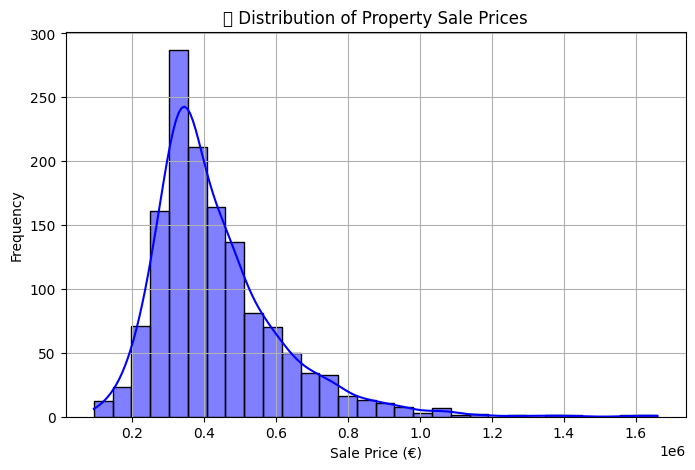

In [69]:
#  Histogram of Sale Prices
plt.figure(figsize=(8,5))
sns.histplot(df["Sale Price (€)"], bins=30, kde=True, color="blue")
plt.xlabel("Sale Price (€)")
plt.ylabel("Frequency")
plt.title("📊 Distribution of Property Sale Prices")
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


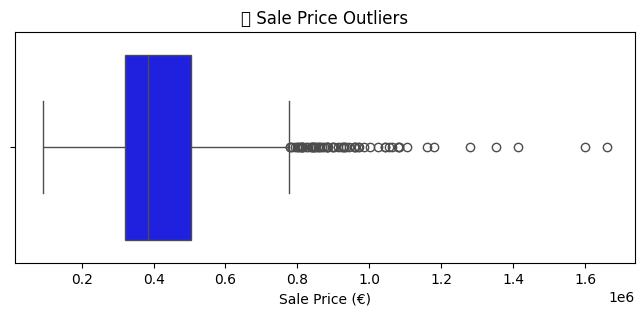

In [70]:

# Boxplot of Sale Prices (for outliers)
plt.figure(figsize=(8,3))
sns.boxplot(x=df["Sale Price (€)"], color="blue")
plt.title("📊 Sale Price Outliers")
plt.show()